# Import Liabraries 

In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2  #pip install opencv-python
import imghdr
import matplotlib.pyplot as plt

C:\Users\91878\AppData\Local\Temp\ipykernel_4008\1790441160.py:5: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir = "E:\Jupyter\ImgData" #the current directory in which data stored

# List of image extension

In [3]:
image_ext = ['jpg','jpeg','png','bmp'] # file extension we need to train our model 

In [4]:
os.listdir(data_dir) #the folder under data_dir 

['happy.zip', 'sad.zip']

In [5]:
for image_class in os.listdir(data_dir): ## Iterate through each subdirectory (image_class) in the data directory
    for image in os.listdir(os.path.join(data_dir,image_class)): # Iterate through each image in the image_class directory
        image_path = os.path.join(data_dir,image_class,image) # Get the full path of the image
        try:
            img = cv2.imread(image_path) # Try to read the image using OpenCV
            tip = imghdr.what(image_path) # Use imghdr to determine the image type (extension)
            if tip not in image_ext:
                print('Image not in extension list {}'.format(image_path)) #image not in the list given,remove it
                os.remove(image_path)
        except Exception as e:
            print('Issue with the image {}'.format(image_path)) #catches any exception print an error message
            

In [6]:
# To create a labeled dataset from image files organized in a directory structure
data = tf.keras.utils.image_dataset_from_directory("E:\Jupyter\ImgData")

Found 304 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator() # It provides elements from the dataset as NumPy arrays

In [8]:
batch = data_iterator.next()

In [9]:
len(batch)

2

In [10]:
batch [0]

array([[[[2.27000000e+02, 1.73000000e+02, 1.26000000e+02],
         [2.27594376e+02, 1.74822266e+02, 1.27822266e+02],
         [2.27985947e+02, 1.77037109e+02, 1.31419922e+02],
         ...,
         [2.10761337e+02, 1.59761337e+02, 1.30761337e+02],
         [2.14782578e+02, 1.63782578e+02, 1.34782578e+02],
         [2.17806641e+02, 1.66806641e+02, 1.37806641e+02]],

        [[2.27000000e+02, 1.73128906e+02, 1.26128906e+02],
         [2.26921692e+02, 1.74912018e+02, 1.27951172e+02],
         [2.27239075e+02, 1.77101562e+02, 1.31548828e+02],
         ...,
         [2.02649231e+02, 1.51649231e+02, 1.22649231e+02],
         [2.05875183e+02, 1.54875183e+02, 1.25875175e+02],
         [2.08226562e+02, 1.57226562e+02, 1.28226562e+02]],

        [[2.26677734e+02, 1.75107422e+02, 1.28214844e+02],
         [2.25658646e+02, 1.76322266e+02, 1.30102356e+02],
         [2.25617126e+02, 1.78181671e+02, 1.33705048e+02],
         ...,
         [1.92939514e+02, 1.41939514e+02, 1.12939507e+02],
         [

In [11]:
batch[0].shape #32 image sample of 256*256 pixels and 3 RGB  #these are features 

(32, 256, 256, 3)

In [12]:
batch[1] #these are targets #0 means Happy and 1 means Sad

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0])

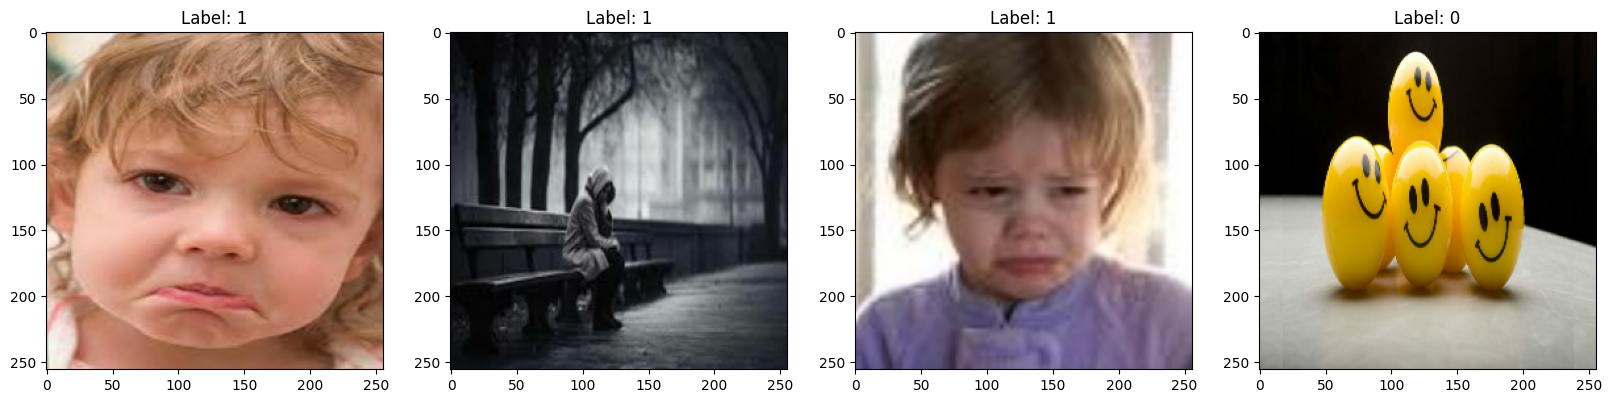

In [13]:
# Create a subplot with 1 row and 4 columns
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Iterate over the first 4 images in the batch
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(f'Label: {batch[1][idx]}')


In [14]:
batch[0].max()

255.0

In [15]:
data=data.map(lambda x,y:(x/255,y))

In [16]:
data.as_numpy_iterator().next()[0]

array([[[[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]

In [17]:
len(data)

10

In [18]:
train_size = int(len(data)*.7)
print(train_size)

7


In [19]:
val_size = int(len(data)*.2)
print (val_size)

2


In [20]:
test_size = int(len(data)*.1)
print(test_size)

1


In [21]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [23]:
model = Sequential()
model.add(Conv2D(16, (3,3),1,activation='relu',input_shape =(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3),1,activation = "relu"))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3),1,activation = "relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [24]:
model.compile("adam",loss = tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [25]:
logdir = "logs"

In [26]:
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train,epochs =15,validation_data=val,callbacks= [tensorboard_callback] )

Epoch 1/15
7/7 [==============================] - 28s 3s/step - loss: 0.7603 - accuracy: 0.5491 - val_loss: 0.6870 - val_accuracy: 0.4531
Epoch 2/15
7/7 [==============================] - 21s 3s/step - loss: 0.6498 - accuracy: 0.7232 - val_loss: 0.6070 - val_accuracy: 0.5781
Epoch 3/15
7/7 [==============================] - 20s 2s/step - loss: 0.5579 - accuracy: 0.6964 - val_loss: 0.4598 - val_accuracy: 0.7969
Epoch 4/15
7/7 [==============================] - 20s 2s/step - loss: 0.4251 - accuracy: 0.8214 - val_loss: 0.4416 - val_accuracy: 0.8125
Epoch 5/15
7/7 [==============================] - 21s 3s/step - loss: 0.3124 - accuracy: 0.8839 - val_loss: 0.1793 - val_accuracy: 0.9531
Epoch 6/15
7/7 [==============================] - 22s 3s/step - loss: 0.2833 - accuracy: 0.8929 - val_loss: 0.2569 - val_accuracy: 0.8906
Epoch 7/15
7/7 [==============================] - 21s 3s/step - loss: 0.2185 - accuracy: 0.9152 - val_loss: 0.1412 - val_accuracy: 0.9688
Epoch 8/15
7/7 [==================

In [28]:
hist.history

{'loss': [0.7603253126144409,
  0.6497610807418823,
  0.5579370260238647,
  0.42505255341529846,
  0.3124437928199768,
  0.283284455537796,
  0.21848507225513458,
  0.12257276475429535,
  0.18230950832366943,
  0.1410437971353531,
  0.06668269634246826,
  0.060327041894197464,
  0.041108984500169754,
  0.032964225858449936,
  0.03971593827009201],
 'accuracy': [0.5491071343421936,
  0.7232142686843872,
  0.6964285969734192,
  0.8214285969734192,
  0.8839285969734192,
  0.8928571343421936,
  0.9151785969734192,
  0.96875,
  0.9285714030265808,
  0.96875,
  0.9955357313156128,
  0.9776785969734192,
  0.9955357313156128,
  0.9955357313156128,
  0.9910714030265808],
 'val_loss': [0.6869778037071228,
  0.6070156097412109,
  0.45976346731185913,
  0.44163021445274353,
  0.17933253943920135,
  0.2569420337677002,
  0.141203373670578,
  0.1243952140212059,
  0.1058724969625473,
  0.16083839535713196,
  0.09456375241279602,
  0.06511855125427246,
  0.04343337565660477,
  0.01912221498787403,
  

In [29]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator():
    x,y =batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 1s 640ms/step


In [31]:
print(f'Precesion:{pre.result()},Recall:{re.result()},Accuracy:{acc.result()}')

Precesion:1.0,Recall:1.0,Accuracy:1.0


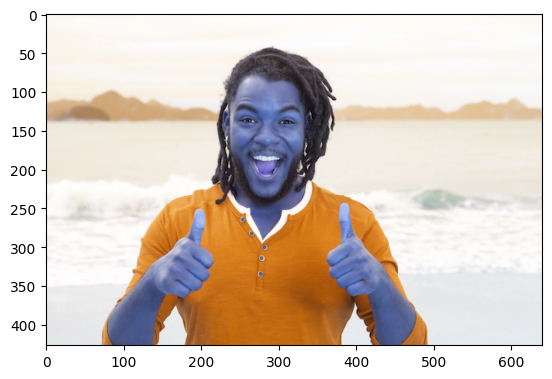

In [59]:
img = cv2.imread("E:\Jupyter\ImgData\happy.zip\Happy-Guy.jpg")
plt.imshow(img)

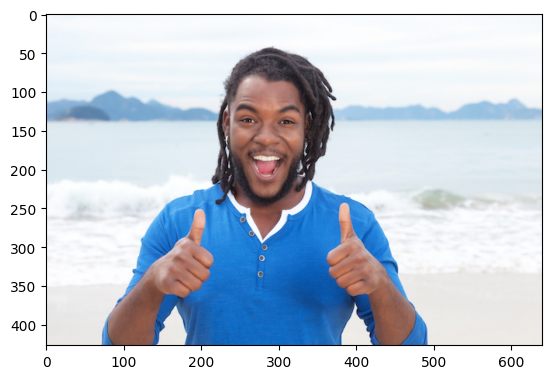

In [60]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

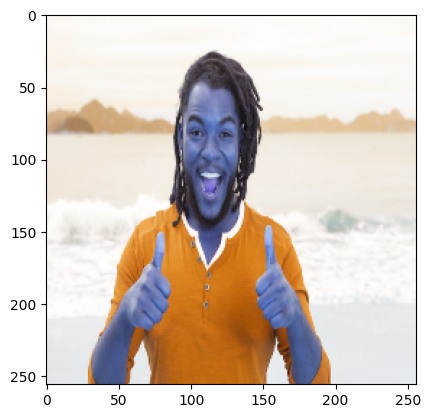

In [61]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))

In [62]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 79ms/step


In [63]:
yhat

array([[0.00249027]], dtype=float32)

In [64]:
if yhat<0.5:
    print('predicted class is happy')
else:
    print('pridicted class is sad')

predicted class is happy


In [38]:
model.save(os.path.join('models','imageclassifier.h5'))

C:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
from tensorflow.keras.models import load_model
new_model = load_model("E:\Jupyter\models\imageclassifier.h5")

In [40]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 202ms/step


array([[0.9540015]], dtype=float32)